# **Clasificador de Imágenes - Animales**

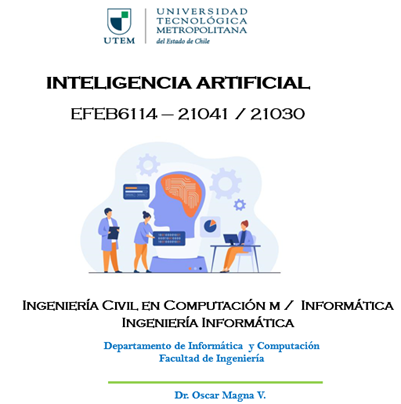

## **Descripción General**

El presente modelo, busca realizar una clasificación de Imágenes respecto a un dataset ya existente. El dataset corresponde a Animales y se poseen 10 tipos de animales, con una cantidad de 28K de datos.


## **Objetivos**



Se desea Implementar un clasificador de Imágenes en Python utilizando la plataforma de Google Colab, para ello se busca lo siguiente:

*   Mejora de precisión: Incrementar la precisión del modelo en la clasificación de animales, reduciendo la tasa de errores.
* Generalización: Asegurar que el modelo pueda generalizar bien en datos no vistos, evitando el sobreajuste a los datos de entrenamiento.
* Eficiencia computacional: Optimizar el rendimiento del modelo para que pueda procesar imágenes de forma más rápida y eficiente, especialmente en entornos con recursos limitados.



## **Alcances**



*  Optimización de hiperparámetros: Realizar una búsqueda sistemática de los hiperparámetros del modelo, como la tasa de aprendizaje, el tamaño del lote y la regularización, para encontrar la configuración óptima que maximice el rendimiento del modelo en términos de precisión y generalización.
* Regularización: Implementar técnicas de regularización, como la disminución de la tasa de aprendizaje, la regularización L1/L2 y la deserción (dropout), para evitar el sobreajuste y mejorar la capacidad del modelo para generalizar en datos nuevos.
* Optimización del rendimiento: Implementar técnicas de optimización del rendimiento, como la paralelización del cómputo y el uso de aceleradores de hardware (por ejemplo, GPU), para mejorar la eficiencia computacional del modelo y reducir los tiempos de entrenamiento e inferencia.



## **Caso de Uso**

### **Adecuación Ambiente de Trabajo**

In [ ]:
# Montar Google Drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:

# Ruta al archivo zip que contiene el conjunto de datos

file_path = "/content/drive/MyDrive/Universidad/2024/Semestre 1/Inteligencia Artificial/animals10.zip"

In [ ]:
# Descomprimir el archivo zip
import zipfile
with zipfile.ZipFile(file_path, 'r') as zip_ref:
  zip_ref.extractall("/content/dataset")

In [ ]:
# Comprobemos el contenido del directorio dataset

import os
dataset_dir = "/content/dataset/raw-img"
print(os.listdir(dataset_dir))

['mucca', 'cane', 'ragno', 'farfalla', 'scoiattolo', 'cavallo', 'gallina', 'pecora', 'gatto', 'elefante']


In [ ]:
# Realizar un análisis exploratorio básico

import matplotlib.pyplot as plt
import cv2

In [ ]:
# Función para cargar y mostrar imágenes
# Dividir el conjunto de datos en entrenamiento y prueba
from sklearn.model_selection import train_test_split

def show_images(directory):
    categories = os.listdir(directory)
    for category in categories:
        path = os.path.join(directory, category)
        for img in os.listdir(path):
          img_array = cv2.imread(os.path.join(path, img))
          img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)  # Convertir de BGR a RGB
          plt.imshow(img_array)
          plt.title(category)
          plt.axis('off')
          plt.show()
          break  # Solo mostramos una imagen de cada categoría
        break  # Solo mostramos una categoría para mantenerlo conciso




In [ ]:
print("==>", os.listdir(dataset_dir))

==> ['mucca', 'cane', 'ragno', 'farfalla', 'scoiattolo', 'cavallo', 'gallina', 'pecora', 'gatto', 'elefante']


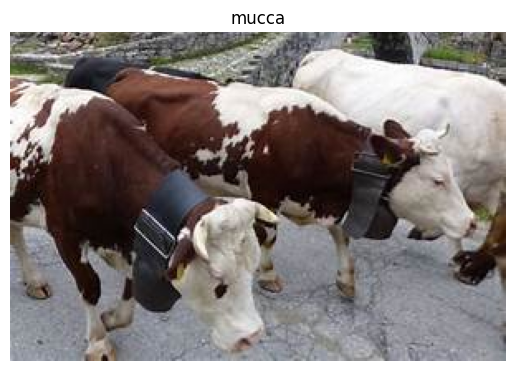

In [ ]:
# Mostrar algunas imágenes de ejemplo

show_images(dataset_dir)


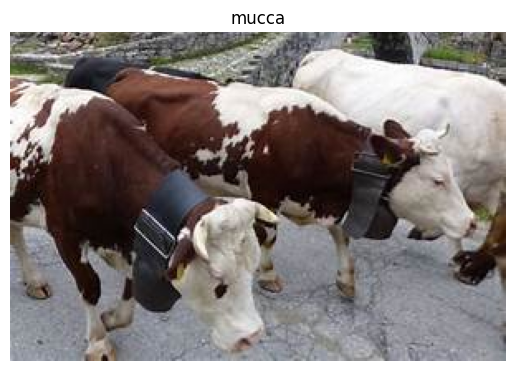

In [ ]:
# Mostrar algunas imágenes de ejemplo

show_images(dataset_dir)

In [ ]:

# Dividir el conjunto de datos en entrenamiento y prueba
from sklearn.model_selection import train_test_split

categories = os.listdir(dataset_dir)
data = []

for category in categories:
    path = os.path.join(dataset_dir, category)
    print("Path=", path)
    nimg = len(os.listdir(path))
    print("categoria=", category, "... No imagens=", nimg)
    label = categories.index(category)
    for img in os.listdir(path):
        try:
            #print ("image=",img)
            img_array = cv2.imread(os.path.join(path, img))
            img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)  # Convertir de BGR a RGB
            img_array = cv2.resize(img_array, (100, 100))  # Redimensionar todas las imágenes a 100x100
            data.append([img_array, label])
        except Exception as e:
            pass  # Ignorar imágenes que no se puedan leer


Path= /content/dataset/raw-img/mucca
categoria= mucca ... No imagens= 1866
Path= /content/dataset/raw-img/cane
categoria= cane ... No imagens= 4863
Path= /content/dataset/raw-img/ragno
categoria= ragno ... No imagens= 4821
Path= /content/dataset/raw-img/farfalla
categoria= farfalla ... No imagens= 2112
Path= /content/dataset/raw-img/scoiattolo
categoria= scoiattolo ... No imagens= 1862
Path= /content/dataset/raw-img/cavallo
categoria= cavallo ... No imagens= 2623
Path= /content/dataset/raw-img/gallina
categoria= gallina ... No imagens= 3098
Path= /content/dataset/raw-img/pecora
categoria= pecora ... No imagens= 1820
Path= /content/dataset/raw-img/gatto
categoria= gatto ... No imagens= 1668
Path= /content/dataset/raw-img/elefante
categoria= elefante ... No imagens= 1446


In [ ]:

# Dividir el conjunto de datos en características y etiquetas
import numpy as np

X = []
y = []

for features, label in data:
    X.append(features)
    y.append(label)

X = np.array(X)
y = np.array(y)

Normalizar los datos
X = X / 255.0

In [ ]:
# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.015, random_state=42)

In [ ]:
# Construir el modelo CNN
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential([
    Conv2D(64, (3, 3), input_shape=X_train.shape[1:], activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(len(categories), activation='softmax')  # Usamos softmax para la clasificación multiclase
])


In [ ]:
# Compilar el modelo
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2  (None, 49, 49, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 47, 47, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 23, 23, 64)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 33856)             0         
                                                                 
 dense (Dense)               (None, 64)                2

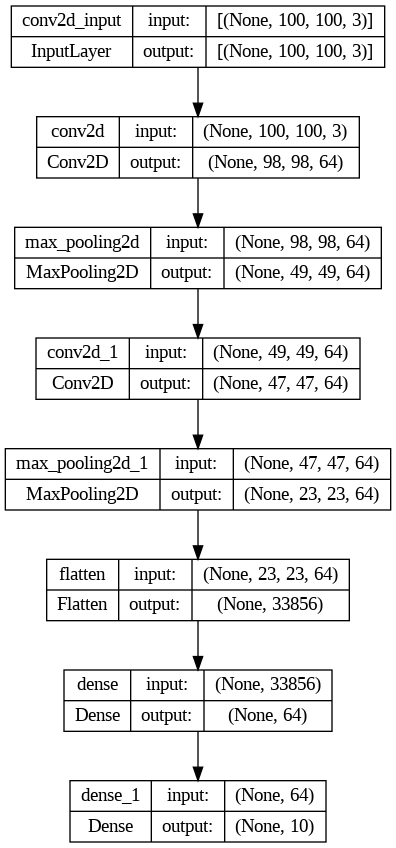

In [ ]:
from keras.utils import plot_model

# Visualización de la red (Modelo), y se guarda el gráfico resultante en disco, en el archivo net.png:
plot_model(model, 'net.png', show_shapes=True)

In [ ]:
# Entrenar el modelo
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
806/806 [==============================] - 16s 14ms/step - loss: 3.8701 - accuracy: 0.2773 - val_loss: 1.9302 - val_accuracy: 0.3079
Epoch 2/10
806/806 [==============================] - 11s 13ms/step - loss: 1.8511 - accuracy: 0.3611 - val_loss: 1.8907 - val_accuracy: 0.3690
Epoch 3/10
806/806 [==============================] - 11s 13ms/step - loss: 1.6506 - accuracy: 0.4342 - val_loss: 1.8068 - val_accuracy: 0.3893
Epoch 4/10
806/806 [==============================] - 10s 13ms/step - loss: 1.4300 - accuracy: 0.5078 - val_loss: 1.8052 - val_accuracy: 0.4097
Epoch 5/10
806/806 [==============================] - 11s 13ms/step - loss: 1.2085 - accuracy: 0.5879 - val_loss: 1.9779 - val_accuracy: 0.3944
Epoch 6/10
806/806 [==============================] - 11s 13ms/step - loss: 0.9981 - accuracy: 0.6583 - val_loss: 1.9945 - val_accuracy: 0.4377
Epoch 7/10
806/806 [==============================] - 11s 13ms/step - loss: 0.7993 - accuracy: 0.7318 - val_loss: 2.1227 - val_accuracy:

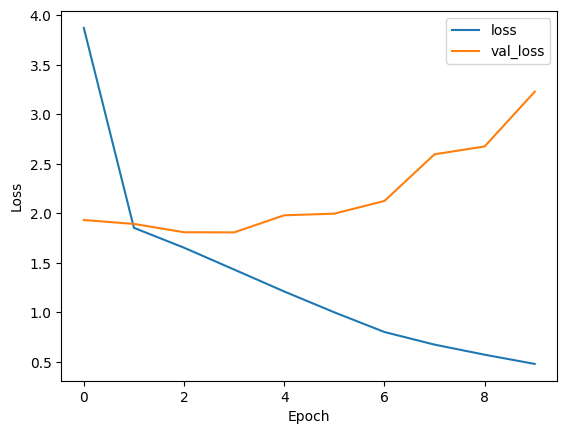

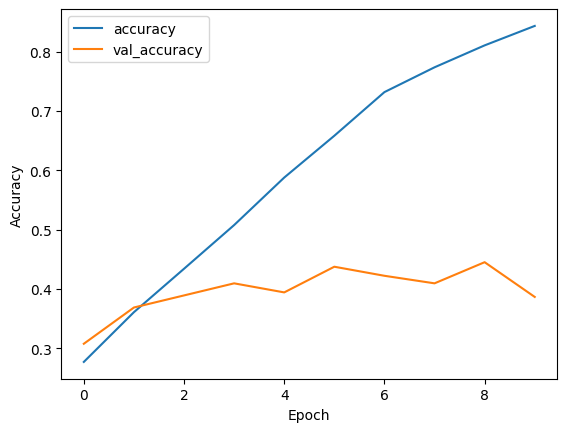

In [ ]:

# Visualizar las curvas de pérdida y precisión
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()